<h1>Import Librairies</h1>

In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 

<h1>Download the Dataset</h1>

In [488]:
#download, read, convert to dataframe and overview
credit = fetch_openml("credit-g")  
credit = credit.frame
credit.head()

e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


<h2>Check if there are missing values</h2>

In [489]:
pd.isna(credit).sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<p>We can conclude there are no missing values</p>

<h2>Check dta information : columns, non-null values count for each feature, features data type</h2>

In [490]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

<p>We can conclude, there are 20 variables where:</p>
<ul>
<li>14 categorical variables</li>
<li>7 numerical variables</li>
</ul>

<h2>Statistic description of numerical variables</h2>

In [491]:
credit.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<p>We can conclude:</p>
<ul>
<li>duration: 75% have a  duration less than 24 months where the maximum duration is 72 months</li>
<li>credit_amount: 75% of credit amount are less than 4000, where the maximum credit amount is about 18400</li>
<li>age: 75% of age are less than 42 years, where 75 years is the maximum age</li>
<li>num_dependents: 75% have only one dependent</li>
</ul>

<h1>Feature Selection</h>


<h2>View all columns</h2>

In [492]:
credit.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

<h2>Selection of most the important features to predict credit risk class </h2>

In [493]:

columns = ['checking_status', 'duration', 'credit_history', 'credit_amount', 'employment', 'installment_commitment', 'property_magnitude', 'age', 'personal_status', 'foreign_worker','class']
X = credit[columns]
X.head()


,checking_status,duration,credit_history,credit_amount,employment,installment_commitment,property_magnitude,age,personal_status,foreign_worker,class
0,<0,6,critical/other existing credit,1169,>=7,4,real estate,67,male single,yes,good
1,0<=X<200,48,existing paid,5951,1<=X<4,2,real estate,22,female div/dep/mar,yes,bad
2,no checking,12,critical/other existing credit,2096,4<=X<7,2,real estate,49,male single,yes,good
3,<0,42,existing paid,7882,4<=X<7,2,life insurance,45,male single,yes,good
4,<0,24,delayed previously,4870,1<=X<4,3,no known property,53,male single,yes,bad


<h1>Preprocessing</h1>

<h2>Categorical and numerical variables separation</h2>


In [494]:
#Columns name
columns = X.columns

#categorical variables
cat_var =[col for col in columns if X[col].dtype != 'int']

#numerical variables
num_var = [col for col in columns if X[col].dtype == 'int']

#visualize separated categorical and numerical variables
cat_var, num_var

(['checking_status',
  'credit_history',
  'employment',
  'property_magnitude',
  'personal_status',
  'foreign_worker',
  'class'],
 ['duration', 'credit_amount', 'installment_commitment', 'age'])

<h2>Unique values for categorical variables</h2>

In [495]:
#check for unique values for each categorical variables
for col in cat_var:
    print(X[col].unique(), '\n')

['<0', '0<=X<200', 'no checking', '>=200']
Categories (4, object): ['0<=X<200', '<0', '>=200', 'no checking'] 

['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
Categories (5, object): ['all paid', 'critical/other existing credit', 'delayed previously', 'existing paid', 'no credits/all paid'] 

['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
Categories (5, object): ['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed'] 

['real estate', 'life insurance', 'no known property', 'car']
Categories (4, object): ['life insurance', 'no known property', 'real estate', 'car'] 

['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
Categories (4, object): ['female div/dep/mar', 'male div/sep', 'male mar/wid', 'male single'] 

['yes', 'no']
Categories (2, object): ['no', 'yes'] 

['good', 'bad']
Categories (2, object): ['bad', 'good'] 



<h2>Encoding categorical variables and scaling numerical variables</h2>

In [496]:
#Encoding Ordinal variable
employement_order = ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7']
encoder = OrdinalEncoder(categories = [employement_order])
X['employment'] = encoder.fit_transform(X[['employment']])

#Econding Nominal variables using Label Encoder
encoder = LabelEncoder()
X[['checking_status','credit_history','employment','property_magnitude','personal_status','foreign_worker', 'class']]  = \
  X[['checking_status','credit_history','employment','property_magnitude','personal_status','foreign_worker', 'class']] .apply(encoder.fit_transform)

#Scalling all Numeric variables
scaler = StandardScaler()
X[num_var] = scaler.fit_transform(X[num_var])

#overview of selected feature after encoding and scaling
X.head()


C:\Users\mariah\AppData\Local\Temp\ipykernel_17040\1073835480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['employment'] = encoder.fit_transform(X[['employment']])
C:\Users\mariah\AppData\Local\Temp\ipykernel_17040\1073835480.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['checking_status','credit_history','employment','property_magnitude','personal_status','foreign_worker', 'class']]  = \
C:\Users\mariah\AppData\Local\Temp\ipykernel_17040\1073835480.py:13: SettingWithCopyWarning: 
A value 

,checking_status,duration,credit_history,credit_amount,employment,installment_commitment,property_magnitude,age,personal_status,foreign_worker,class
0,1,-1.236478,1,-0.745131,4,0.918477,3,2.766456,3,1,1
1,0,2.248194,3,0.949817,2,-0.870183,3,-1.191404,0,1,0
2,3,-0.738668,1,-0.416562,3,-0.870183,3,1.183312,3,1,1
3,1,1.750384,3,1.634247,3,-0.870183,1,0.831502,3,1,1
4,1,0.256953,2,0.566664,2,0.024147,2,1.535122,3,1,0


<h1>Check for relationship</h1>

<h3>check for correlation using pairplot</h3>

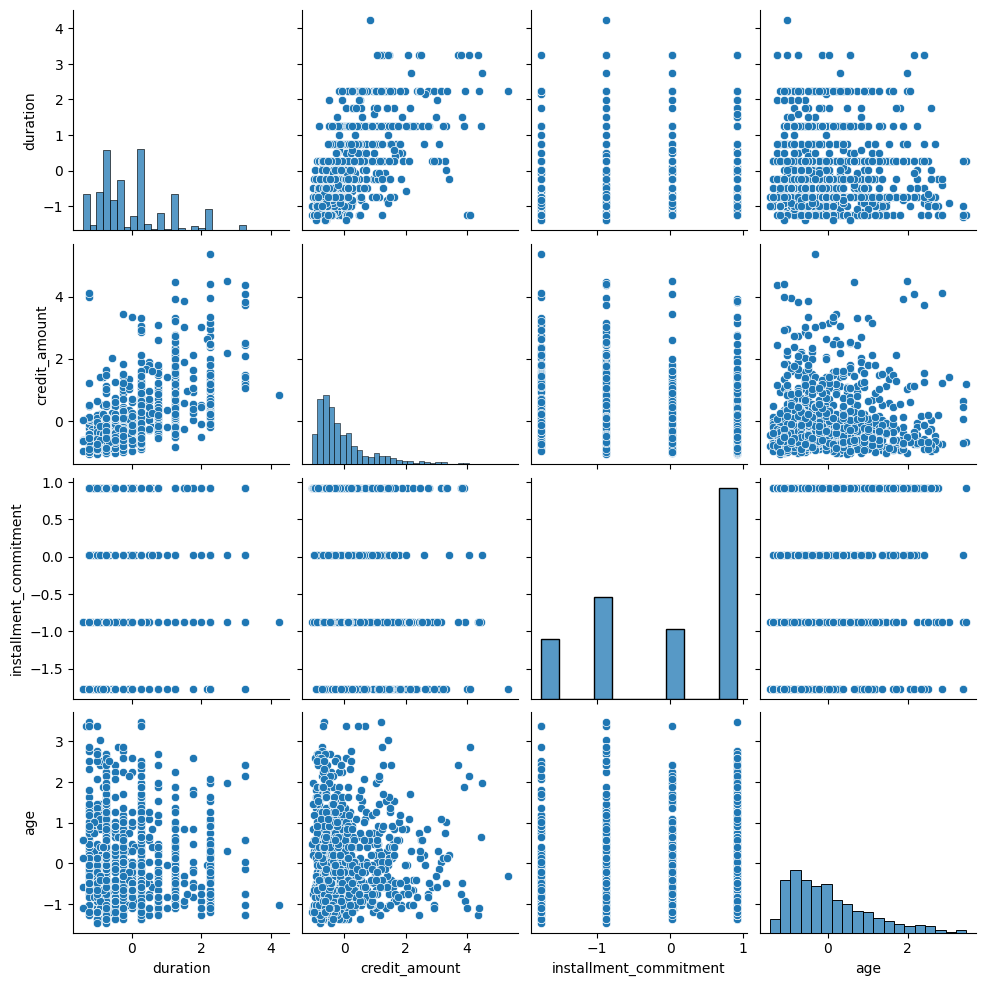

In [497]:
#check for correlation using pairplot
sb.pairplot(X[num_var])

<p>We can conclude that there is no significant correlation between numerical variables</p>

<h3>check for correlation using heatmap</h3>

<Axes: >

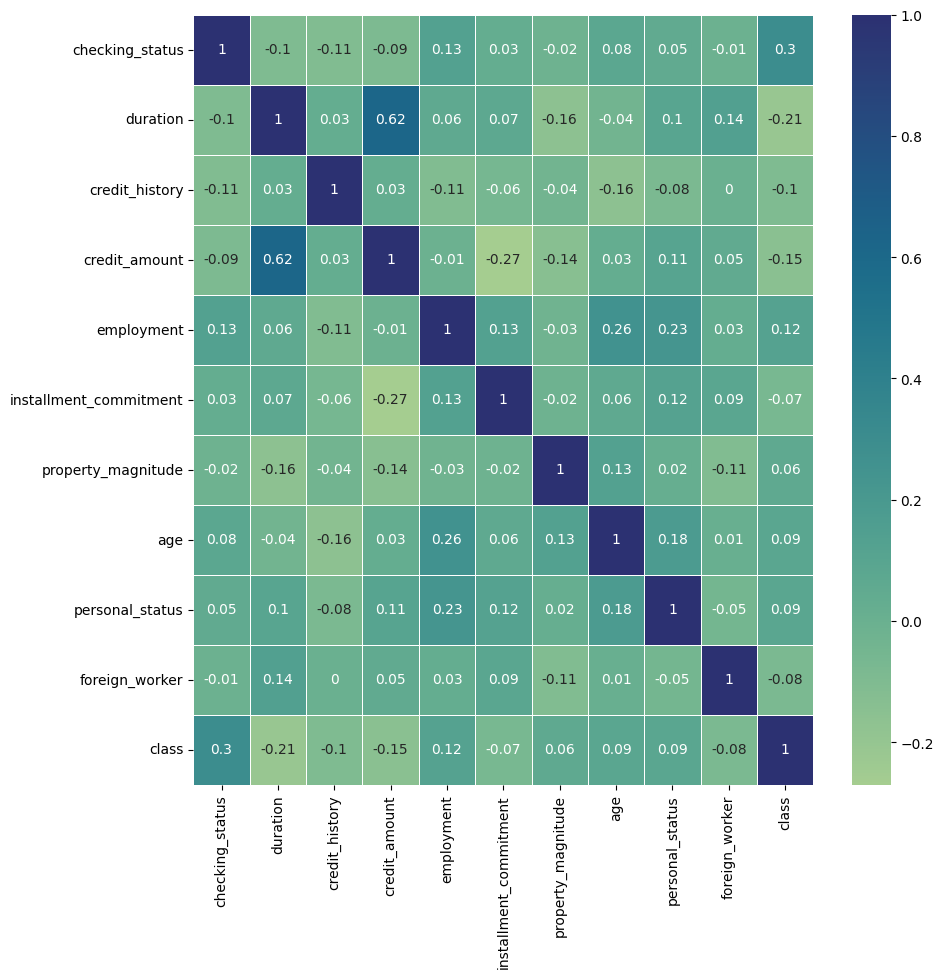

In [498]:
#check for correlation using heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(X.corr().round(2),annot = True,  linewidth=.5, cmap="crest")

<p>We can conclude that:</p>
<ul>
<li>there is no significant correlation between variables</li>
<li>duration and credit_amount have the highest correlation of 62%</li>
<li>checking_status, duration, credit_amount and employement are factors that have the most influence on credit risk class, where:
    <ul>
    <li>checking_status and employement having positive influence</li>
    <li> duration and credit_amount having negative influence</li>
    </ul>
</li>
</ul>


<h2>Dealing with NaN values</h2>

In [499]:
#Extract the target value corresponding to the credit risk class
y = X['class']

#remove the credit risk class from the features
X.drop(['class'], axis = 1, inplace = True)

#check for NaN values
X.isna().sum(), y.isna().sum()

C:\Users\mariah\AppData\Local\Temp\ipykernel_17040\858045745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['class'], axis = 1, inplace = True)


(checking_status           0
 duration                  0
 credit_history            0
 credit_amount             0
 employment                0
 installment_commitment    0
 property_magnitude        0
 age                       0
 personal_status           0
 foreign_worker            0
 dtype: int64,
 np.int64(0))

<h1>Model training and testing</h1>

<h2>Spliting data</h2>

In [500]:
#Split features to train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h2>Using Logistic Regression for credit risk classification</h2>

In [501]:
#create logistic regression model
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')

#model fitting
model.fit(X_train, y_train)

#predict using the fitted model
y_pred = model.predict(X_test)

#Evaluate model performance
score = model.score(X_test,y_test)*100

#view performance score
print(f'score = {score}')

score = 75.0


e:\AI_ML_ROBOGARDEN\LABORATORY\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<h2>Using KNN for credit risk Classification</h2>

In [502]:
# Choose value of K 
K = range(1, 100, 2)
k = 1
y_score = -1
for i in K:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_actual_score = model.score(X_test, y_test)
    if y_actual_score > y_score:
        y_score = y_actual_score
        k = i
        best_model = model

#create model using the best number of neighbors
model = best_model

#fit model
model.fit(X_train, y_train)

#predict using the fitted model
y_pred = model.predict(X_test)

#evaluate the model performance
y_score= model.score(X_test, y_test)*100

#print score perfomance and the best number of neibors for modelisation
print(f'score = {y_score}, k = {k}')

score = 77.5, k = 11


<h2>Using Support Vector Machine for credit risk Classification</h2>

In [503]:
#create vector machine model
classifier = SVC(kernel='sigmoid')

#fit the model
classifier.fit(X_train, y_train)

#use the fitted model to predict the credit risk class
y_pred = classifier.predict(X_test)

#evaluate the model performance using confusion matrix
conf = confusion_matrix(y_test, y_pred)
print(f'confusion_matrix = {conf}')

#model performance using precision
precision = conf[1,1]/(conf[1,1] +conf[1,0])*100
print(f'precision = {precision}')

#model performance using recall
recall = conf[1,1]/(conf[1,1] +conf[0,1])*100
print(f'recall = {recall}')

#model performance using f1_score
def f1_scores(x, y):
    return 2/(1/x + 1/y)

f1_score = f1_scores(precision, recall)
print(f'f1_score = {f1_score}')

confusion_matrix = [[ 19  40]
 [ 27 114]]
precision = 80.85106382978722
recall = 74.02597402597402
f1_score = 77.28813559322033


<h2>Using Decision Tree for credit risk Classification</h2>

In [504]:
#create model
model = DecisionTreeClassifier(criterion='gini', splitter='best')

#fit the model
model.fit(X_train, y_train)

#predict using the fitted model
y_pred = model.predict(X_test)

#evaluate model performance
score = model.score(X_test,y_test)*100

#print score performance
print(f'score = {score}')

score = 71.0


<h2>Using RandomForest Classifier  for credit risk Classification</h2>

In [505]:

K = range(1,45)
score = -1
for i in K:
    model = RandomForestClassifier(n_estimators=i, criterion='gini')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    actual_score = model.score(X_test,y_test)
    if actual_score > score:
        score = actual_score
        k = i
        best_model = model

#create model using the best number related to highest score
model = best_model

#fit the model
model.fit(X_train, y_train)

#predict credit risk class using the fitted model
y_pred = model.predict(X_test)

#evaluate the model performance
score = model.score(X_test,y_test)*100

#print the score performance of the model
print('score=', score, 'k =', k)

score= 77.5 k = 26
